<a href="https://colab.research.google.com/github/Mayvei64/Piramida/blob/main/ML_lab%E2%84%961_Usyninprog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [ ]:
data_cirrhosis = pd.read_csv('cirrhosis.csv')
data_cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Выведем статистическую информацию о наборе данных и почистим датасет

In [ ]:
data_cirrhosis.describe() # количественные признаки

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [ ]:
data_cirrhosis.describe(include=['O']) # Качестввенные признаки

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,418,312,418,312,312,312,418
unique,3,2,2,2,2,2,3
top,C,D-penicillamine,F,N,Y,N,N
freq,232,158,374,288,160,222,354


In [ ]:
data_cirrhosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
# Выводим названия столбцов
print(data_cirrhosis.columns)

# Выводим названия строк
print(data_cirrhosis.index)

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')
RangeIndex(start=0, stop=418, step=1)


## Заполнение пропусков - пустых значений

In [ ]:
number_of_people_1 = len(data_cirrhosis.index) # Количество людей до удаления строк с NaN из датасета

In [ ]:
data_cirrhosis.isnull().sum() # Узнаем количество пропущенных значений в столбцах

,0
ID,0
N_Days,0
Status,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0


Видим, что пропуски присутствуют в признаках: Drug, Ascites, Hepatomegaly, Spiders, Cholesterol, Copper, Alk_Phos, SGOT, Trygliceride, Platelets, Prothrombin, Stage

Также обратим внимание на то, что есть много пропущенных значений в столбце "Drug". Мы не сможем восстановить пустые значения, потому что неизвестно какими лекарством лечили человека, поэтому просто удалим все строки с "NaN"

In [ ]:
data_cirrhosis = data_cirrhosis.dropna(subset=['Drug'])
data_cirrhosis

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [ ]:
difference = number_of_people_1 - len(data_cirrhosis.index)
print(f'Количество пациентов с пустыми строками в стобце "лекарство" = {difference}')
print(f'Количество оставшихся пациентов = {len(data_cirrhosis.index)}')

Количество пациентов с пустыми строками в стобце "лекарство" = 106
Количество оставшихся пациентов = 312


In [ ]:
data_cirrhosis.isnull().sum() # Узнаем количество пропущенных значений в столбцах

,0
ID,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0


Оставшиеся пропущенные значения заменим средним, т.е наиболее популярным значением.

In [ ]:
data_cirrhosis.Cholesterol = data_cirrhosis.Cholesterol.fillna(data_cirrhosis.Cholesterol.mean())
data_cirrhosis.Tryglicerides = data_cirrhosis.Tryglicerides.fillna(data_cirrhosis.Tryglicerides.mean())
data_cirrhosis.Platelets = data_cirrhosis.Platelets.fillna(data_cirrhosis.Platelets.mean())
data_cirrhosis.Copper = data_cirrhosis.Copper.fillna(data_cirrhosis.Copper.mean())

In [ ]:
data_cirrhosis.isnull().sum() # Узнаем количество пропущенных значений в столбцах

,0
ID,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0


Всё! мы заполнили недостающие данные. Датасет готов к анализу.

## Заменим категориальные данные количественными

Для начала найдём все столбцы с категориальными данными

In [ ]:
for col in data_cirrhosis.columns:
    if data_cirrhosis[col].dtype == 'object':
        print(col)

Status
Drug
Sex
Ascites
Hepatomegaly
Spiders
Edema


In [ ]:
data_cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
print(data_cirrhosis['Status'].unique()) # Выведем все возможные варианты статуса пациента

['D' 'C' 'CL']


Из приложенного документа к датасету нам известно, что: D - смерть, C - цензурировано, CL - цензурировано из-за трансплантации печени.
Предлагаю каждому статусу сопоставить число
D - 0, C - 1, CL - 2.

In [ ]:
def Binar(column,a,b):
  return data_cirrhosis[column].replace([a], 0).replace([b], 1)
def Tertia(column,a,b,c):
  return data_cirrhosis[column].replace([a], 0).replace([b], 1).replace([c], 2)

In [ ]:
data_cirrhosis['Status'] = Tertia('Status','D','C','CL')
data_cirrhosis['Drug'] = Binar('Drug','Placebo','D-penicillamine')
data_cirrhosis['Sex'] = Binar('Sex','F','M')
data_cirrhosis['Ascites'] = Binar('Ascites','N','Y')
data_cirrhosis['Hepatomegaly'] = Binar('Hepatomegaly','N','Y')
data_cirrhosis['Spiders'] = Binar('Spiders','N','Y')
data_cirrhosis['Edema'] = Tertia('Edema','N','S','Y')
data_cirrhosis.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,0,1,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,1,1,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,0,1,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,0,1,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,2,0,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Визуализизация данных

Посмотрим на статистику людей принимавших лекарства

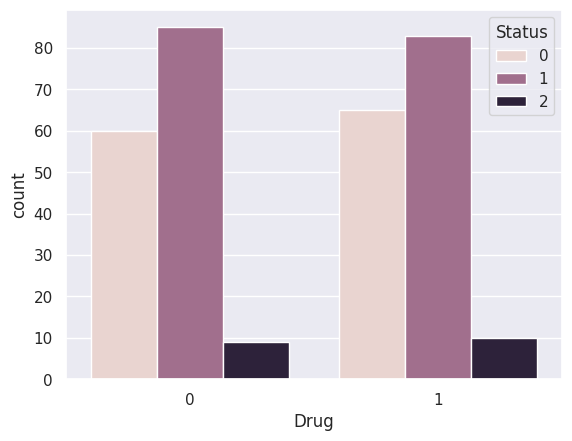

In [ ]:
sns.countplot(data=data_cirrhosis, x="Drug", hue='Status');

In [ ]:
filtered1 = data_cirrhosis[(data_cirrhosis["Status"] == 0 ) & (data_cirrhosis["Drug"] == 0)]
filtered2 = data_cirrhosis[(data_cirrhosis["Status"] == 1 ) & (data_cirrhosis["Drug"] == 0)]
filtered3 = data_cirrhosis[(data_cirrhosis["Status"] == 2 ) & (data_cirrhosis["Drug"] == 0)]
print('Лечившиеся плацебой')
print(f'Количество погибших людей = {len(filtered1.Status)}')
print(f'Количество людей под цензурой,но живых = {len(filtered2.Status)}')
print(f'Количество людей под цензурой из-за трансплантации печени, но живых = {len(filtered3.Status)}')

Лечившиеся плацебой
Количество погибших людей = 60
Количество людей под цензурой,но живых = 85
Количество людей под цензурой из-за трансплантации печени, но живых = 9


In [ ]:
print('Лечившиеся D-пеницилламином')
print(f'Количество погибших людей = {len(data_cirrhosis[(data_cirrhosis["Status"] == 0 ) & (data_cirrhosis["Drug"] == 1)].Status)}')
print(f'Количество людей под цензурой,но живых = {(len(data_cirrhosis[(data_cirrhosis["Status"] == 1 ) & (data_cirrhosis["Drug"] == 1)].Status))}')
print(f'Количество людей под цензурой из-за трансплантации печени, но живых = {(len(data_cirrhosis[(data_cirrhosis["Status"] == 2 ) & (data_cirrhosis["Drug"] == 1)].Status))}')

Лечившиеся D-пеницилламином
Количество погибших людей = 65
Количество людей под цензурой,но живых = 83
Количество людей под цензурой из-за трансплантации печени, но живых = 10


Интересно, количество выживших людей благодаря плацебо больше, чем людей лечившихся настоящим лекарством. Можно выдвинуть гипотезу о том, что вера человека помогает ему выжить, но это не совсем правда, нам просто не хватает данных................
╮( ˘ ､ ˘ )╭


In [ ]:
filter_D = data_cirrhosis[(data_cirrhosis["Status"] != 0) & (data_cirrhosis["Drug"] !=2)]

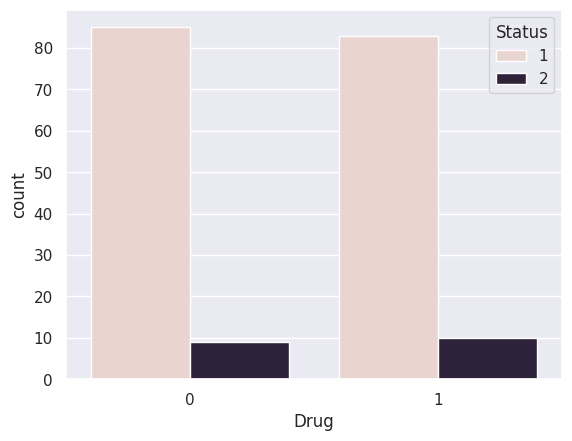

In [ ]:
sns.countplot(data=filter_D, x="Drug", hue='Status'); # кол-ов людей вылечившейся благодаря плацебо против людей выличившихся благодаря лекарству

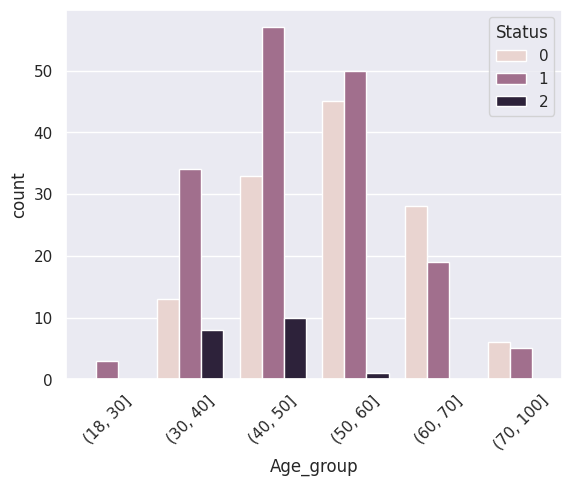

In [ ]:
data_cirrhosis["Age_yers"] = data_cirrhosis['Age']/365
data_cirrhosis["Age_group"] = pd.cut(x=data_cirrhosis['Age_yers'], bins=[18,30,40,50,60,70, 100])
plt.xticks(rotation=45)
sns.countplot(data=data_cirrhosis, hue='Status', x='Age_group');

Можно сделать вывод, что цирозом печени страдают взрослые люди 40-60 лет.

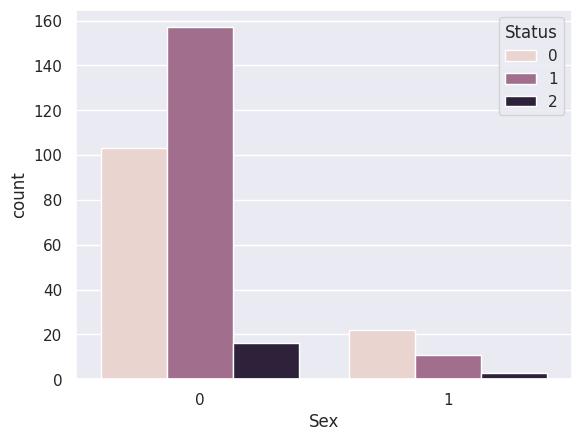

In [ ]:
sns.countplot(data=data_cirrhosis, x="Sex", hue='Status');

Если сопоставить этот график с статистикой выше, то можно сделать вывод о том, что циррозом печени чаще всех болеют женщины в возрасте 40-60 лет. Я углубился в интернет и это действительно так!

Согласно медицинским исследованиям, женщины действительно могут быть подвержены большему риску развития цирроза печени по сравнению с мужчинами. Это связано со следующими факторами:

1. Женщины обычно имеют меньшую массу тела и объем крови, чем мужчины, что может влиять на то, как организм реагирует на повреждения и болезни.

2. У женщин уровень гормонов эстрогенов выше, чем у мужчин, и эти гормоны могут способствовать развитию воспаления и фиброза в печени.

3. Также было установлено, что женщины часто подвержены хроническому гепатиту C, который является одной из основных причин цирроза.

<Axes: xlabel='Status', ylabel='Count'>

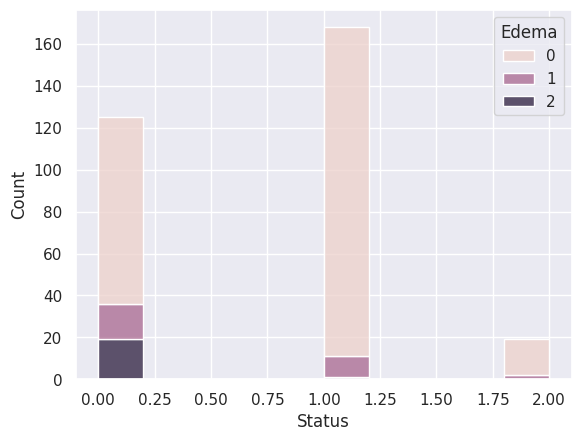

In [ ]:
sns.histplot(data_cirrhosis, x = 'Status', hue = 'Edema', multiple="stack" )

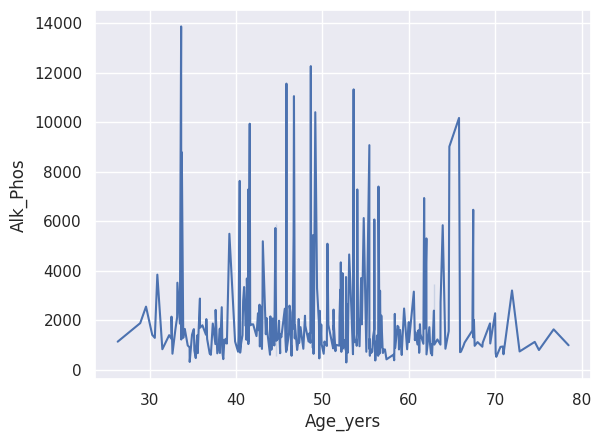

In [ ]:
sns.lineplot(data=data_cirrhosis, x='Age_yers', y='Alk_Phos');

 **Дальше будут по 2 визуализации для каждого параметра датасета**



### Визуализация параметра по возрасту

(array([ 8., 31., 38., 51., 53., 59., 35., 21., 12.,  4.]),
 array([26.29589041, 31.51561644, 36.73534247, 41.95506849, 47.17479452,
        52.39452055, 57.61424658, 62.8339726 , 68.05369863, 73.27342466,
        78.49315068]),
 <BarContainer object of 10 artists>)

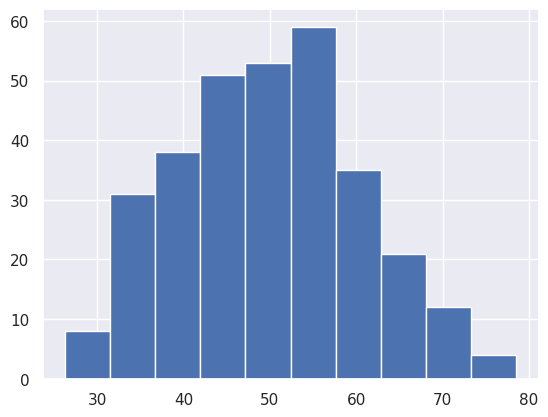

In [ ]:
plt.hist(data_cirrhosis['Age_yers']) # гистограмма по возрасту

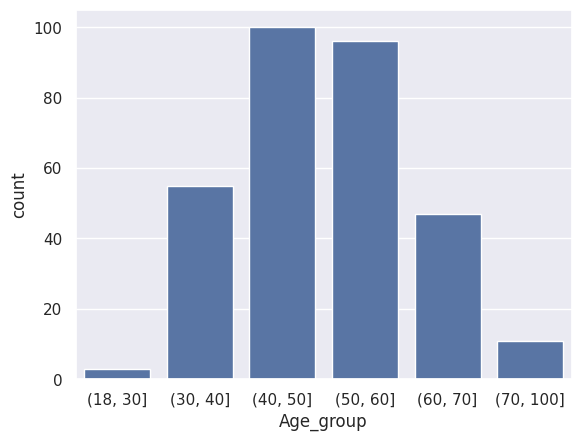

In [ ]:
sns.countplot(data=data_cirrhosis, x="Age_group");

### Визуализация параметра "Лекарства"

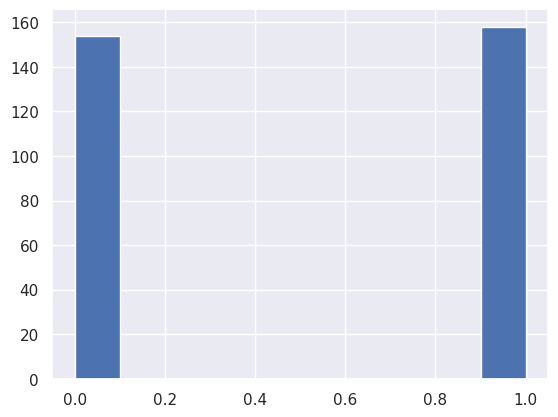

In [ ]:
plt.hist(data_cirrhosis['Drug']);

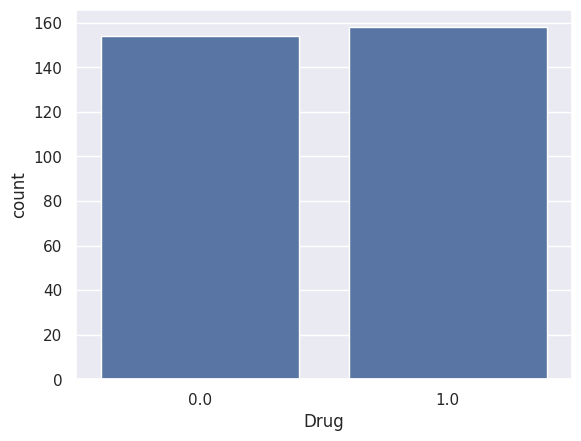

In [ ]:
sns.countplot(x = data_cirrhosis['Drug']);

### Визуализация параметра "количество дней между регистрацией и более ранним моментом смерти"

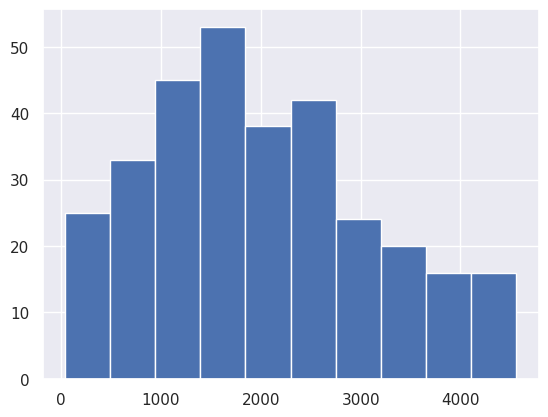

In [ ]:
plt.hist(data_cirrhosis['N_Days']);
# количество дней между регистрацией и более ранним моментом смерти,
# трансплантации или анализа исследования в июле 1986 г.

<ipython-input-40-601da90e30a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cirrhosis["N_Days_group"] = pd.cut(x=data_cirrhosis['N_Days'], bins=[0,500,1000,1500,2000,2500,3000,3500,4000]);


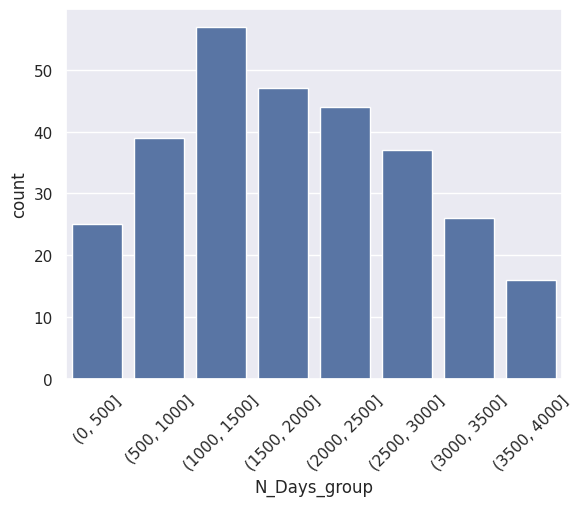

In [ ]:
data_cirrhosis["N_Days_group"] = pd.cut(x=data_cirrhosis['N_Days'], bins=[0,500,1000,1500,2000,2500,3000,3500,4000]);
plt.xticks(rotation=45);
sns.countplot(x = data_cirrhosis['N_Days_group']);

### Визуализация параметра "Статус"



0 - D(смерть)
1 - C(подвергнут цензуре)
2 - СL(подвергнут цензуре из-за повреждения печени))

<Axes: xlabel='Status', ylabel='count'>

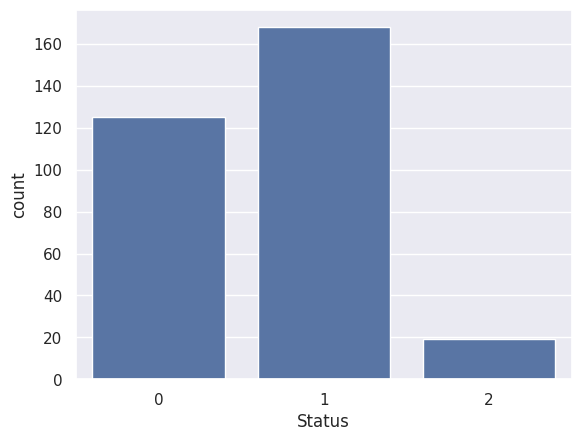

In [ ]:
sns.countplot(x = data_cirrhosis['Status'])
# 0 - D(смерть)
# 1 - C(подвергнут цензуре)
# 2 - СL(подвергнут цензуре из-за повреждения печени))

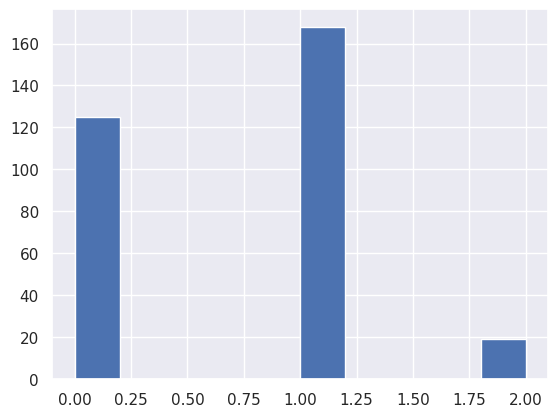

In [ ]:
plt.hist(data_cirrhosis['Status']);

### Визуализация параметра "Содержание билирубина"

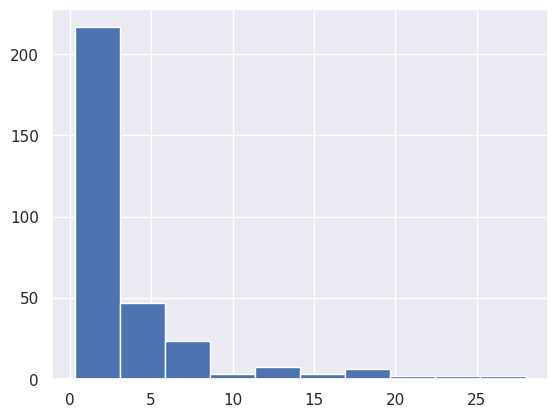

In [ ]:
plt.hist(data_cirrhosis['Bilirubin']);

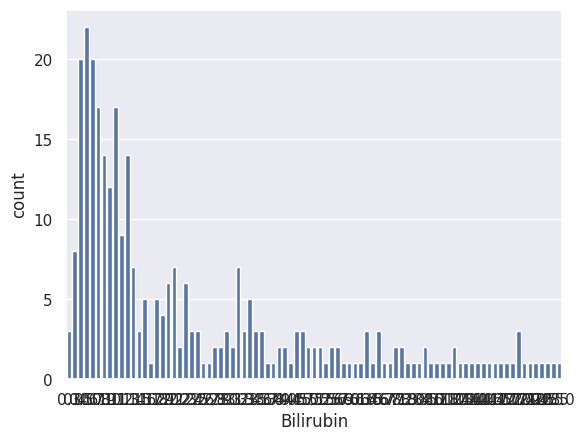

In [ ]:
sns.countplot(x = data_cirrhosis['Bilirubin']);

### Визуализация параметра "Едема"

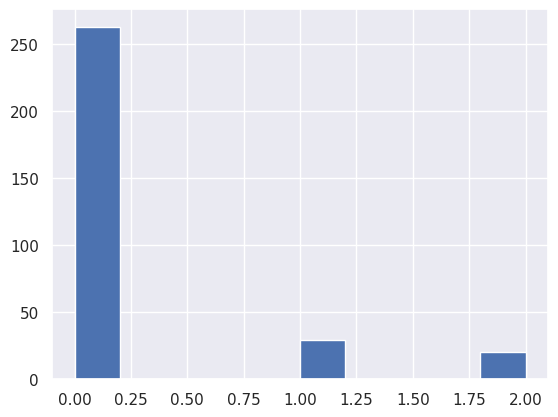

In [ ]:
plt.hist(data_cirrhosis['Edema']);

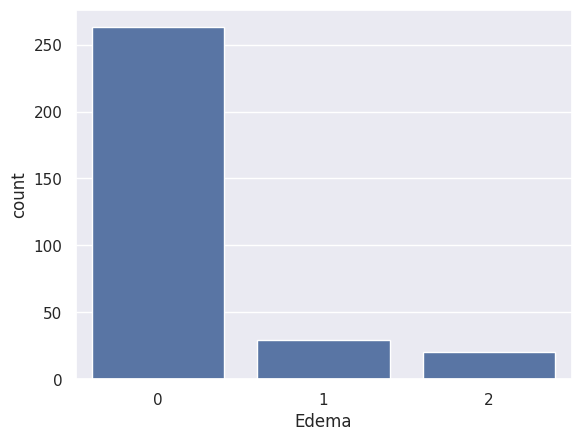

In [ ]:
sns.countplot(x = data_cirrhosis['Edema']);

### Визуализация параметра "Пауки"


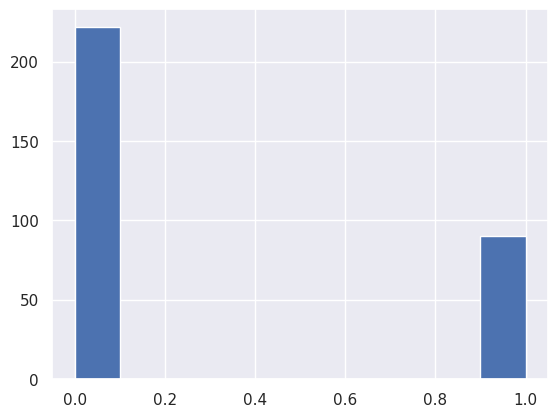

In [ ]:
plt.hist(data_cirrhosis['Spiders']);

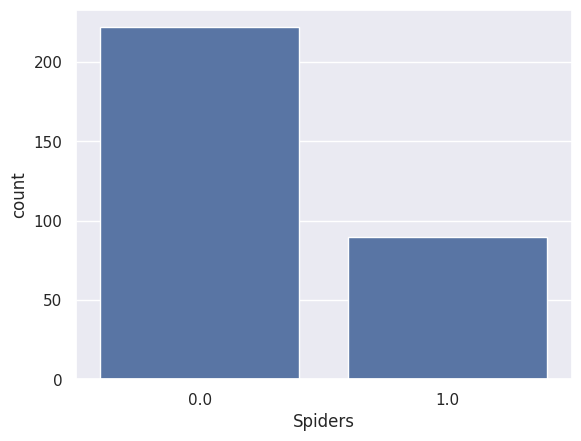

In [ ]:
sns.countplot(x = data_cirrhosis['Spiders']);

### Визуализация параметра "Гепатомегалия"

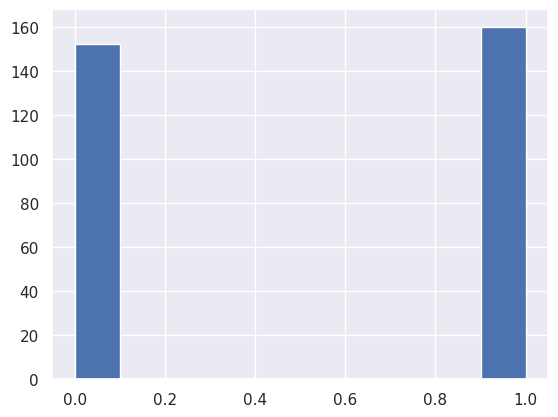

In [ ]:
plt.hist(data_cirrhosis['Hepatomegaly']);

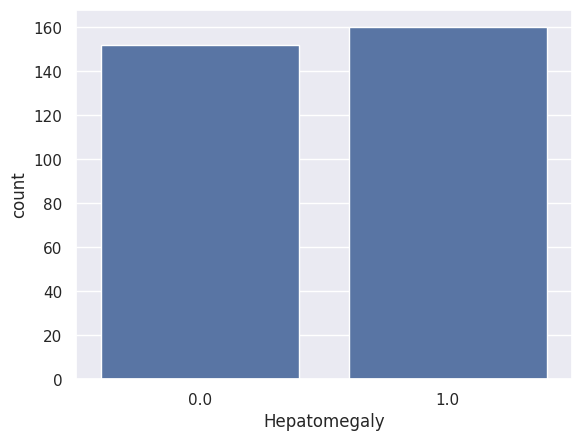

In [ ]:
sns.countplot(x = data_cirrhosis['Hepatomegaly']);

### Визуализация параметра "Уровень холестерина в сыворотке крови"






(array([118., 146.,  28.,   6.,   3.,   4.,   2.,   1.,   2.,   2.]),
 array([ 120. ,  285.5,  451. ,  616.5,  782. ,  947.5, 1113. , 1278.5,
        1444. , 1609.5, 1775. ]),
 <BarContainer object of 10 artists>)

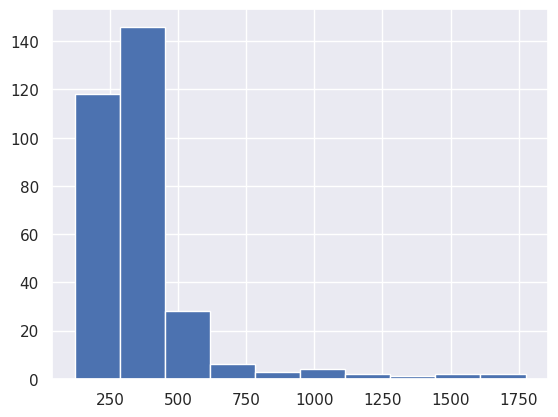

In [ ]:
plt.hist(data_cirrhosis['Cholesterol'])
# уровень холестерина в сыворотке крови

<ipython-input-45-829d4c2c440e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cirrhosis["Cholesterol_group"] = pd.cut(x=data_cirrhosis['Cholesterol'], bins=[0,100,200,300,500,700,1000,1500,2000]);


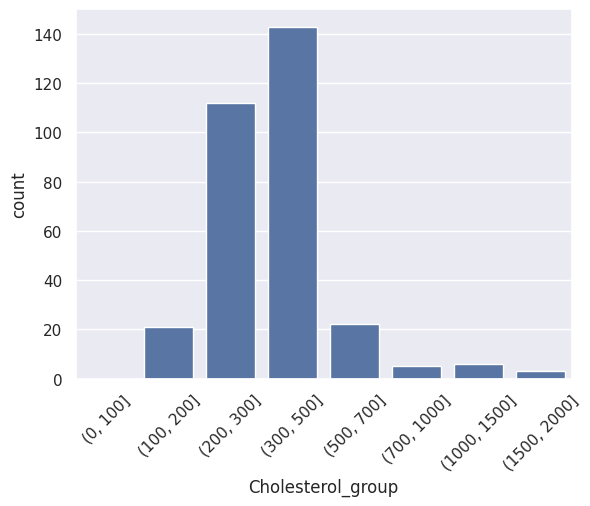

In [ ]:
data_cirrhosis["Cholesterol_group"] = pd.cut(x=data_cirrhosis['Cholesterol'], bins=[0,100,200,300,500,700,1000,1500,2000]);
plt.xticks(rotation=45);
sns.countplot(x = data_cirrhosis['Cholesterol_group']);

### Визуализация параметра "Альбумин в [г/дл] "

(array([ 2.,  4., 10., 21., 39., 86., 82., 50., 14.,  4.]),
 array([1.96 , 2.228, 2.496, 2.764, 3.032, 3.3  , 3.568, 3.836, 4.104,
        4.372, 4.64 ]),
 <BarContainer object of 10 artists>)

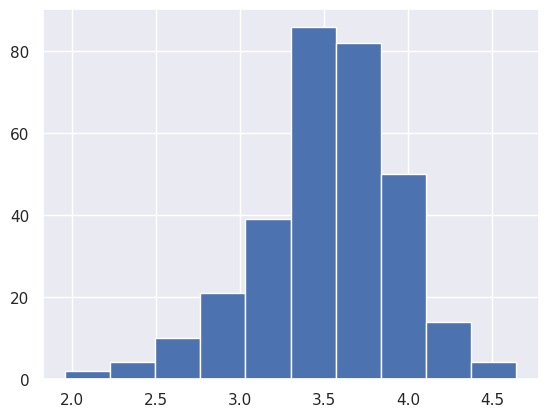

In [ ]:
plt.hist(data_cirrhosis['Albumin'])

<ipython-input-49-d610bb4e47d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cirrhosis["Albumin_group"] = pd.cut(x=data_cirrhosis['Albumin'], bins=[0,1,2,2.5,3,3.5,4,4.5,5]);


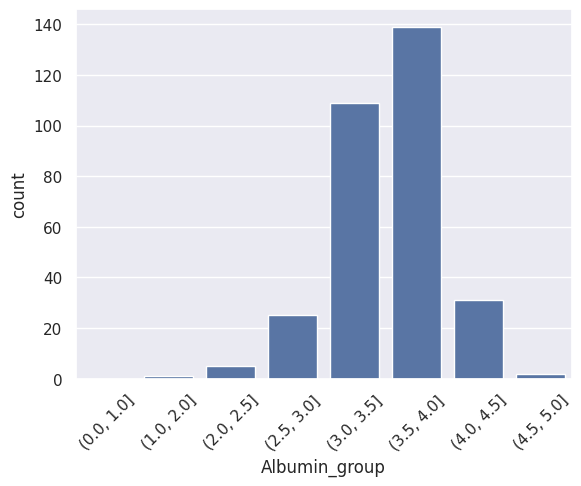

In [ ]:
data_cirrhosis["Albumin_group"] = pd.cut(x=data_cirrhosis['Albumin'], bins=[0,1,2,2.5,3,3.5,4,4.5,5]);
plt.xticks(rotation=45);
sns.countplot(x = data_cirrhosis['Albumin_group']);

### Визуализация параметра "Медь в анализах"

(array([131.,  96.,  42.,  25.,  10.,   1.,   3.,   2.,   0.,   2.]),
 array([  4. ,  62.4, 120.8, 179.2, 237.6, 296. , 354.4, 412.8, 471.2,
        529.6, 588. ]),
 <BarContainer object of 10 artists>)

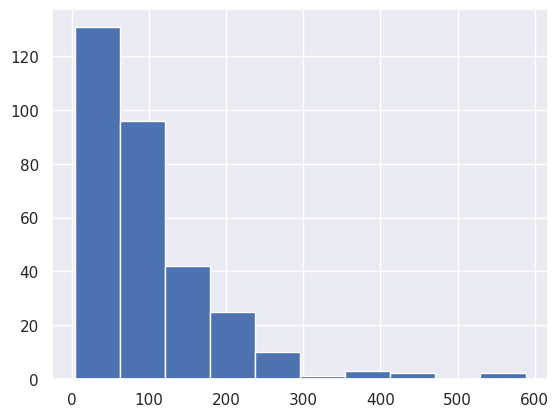

In [ ]:
plt.hist(data_cirrhosis['Copper'])
# Медь

<ipython-input-50-6391b6d3ec42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cirrhosis["Copper_group"] = pd.cut(x=data_cirrhosis['Copper'], bins=[0,50,100,150,200,300,400,500,600]);


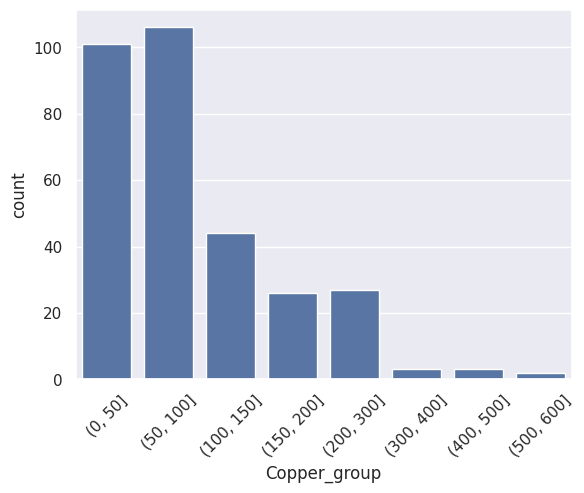

In [ ]:
data_cirrhosis["Copper_group"] = pd.cut(x=data_cirrhosis['Copper'], bins=[0,50,100,150,200,300,400,500,600]);
plt.xticks(rotation=45);
sns.countplot(x = data_cirrhosis['Copper_group']);

### Визуализация параметра "щелочная фосфатаза"

(array([202.,  67.,  14.,   7.,   7.,   4.,   3.,   4.,   3.,   1.]),
 array([  289.  ,  1646.34,  3003.68,  4361.02,  5718.36,  7075.7 ,
         8433.04,  9790.38, 11147.72, 12505.06, 13862.4 ]),
 <BarContainer object of 10 artists>)

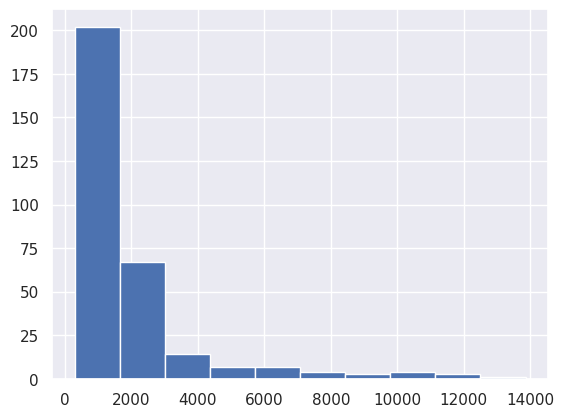

In [ ]:
plt.hist(data_cirrhosis['Alk_Phos'])
# щелочная фосфатаза

<ipython-input-51-6799b32f3f00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cirrhosis["Alk_Phos_group"] = pd.cut(x=data_cirrhosis['Alk_Phos'], bins=[0,1000,1500,2000,2500,3000,3500,4000,4500]);


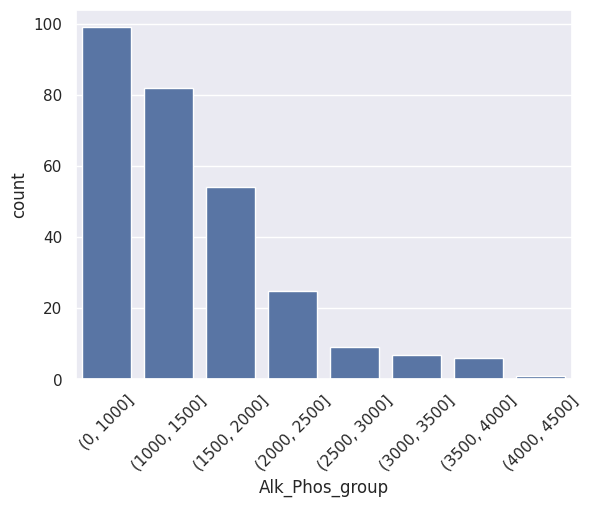

In [ ]:
data_cirrhosis["Alk_Phos_group"] = pd.cut(x=data_cirrhosis['Alk_Phos'], bins=[0,1000,1500,2000,2500,3000,3500,4000,4500]);
plt.xticks(rotation=45);
sns.countplot(x = data_cirrhosis['Alk_Phos_group']);

### Визуализация параметра "SGOT"

(array([ 42., 110.,  89.,  44.,  18.,   4.,   2.,   2.,   0.,   1.]),
 array([ 26.35,  69.44, 112.53, 155.62, 198.71, 241.8 , 284.89, 327.98,
        371.07, 414.16, 457.25]),
 <BarContainer object of 10 artists>)

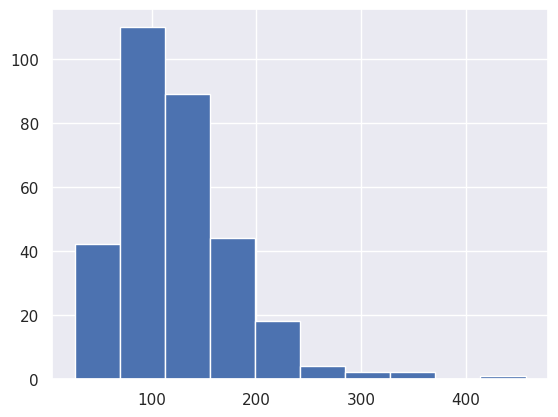

In [ ]:
plt.hist(data_cirrhosis['SGOT'])
# SGOT

<ipython-input-53-fc0fab6db7fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cirrhosis["SGOT_group"] = pd.cut(x=data_cirrhosis['SGOT'], bins=[0,50,80,100,150,200,250,300,350]);


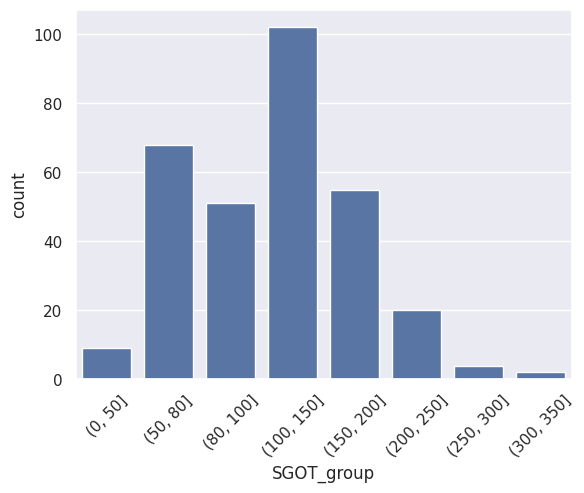

In [ ]:
data_cirrhosis["SGOT_group"] = pd.cut(x=data_cirrhosis['SGOT'], bins=[0,50,80,100,150,200,250,300,350]);
plt.xticks(rotation=45);
sns.countplot(x = data_cirrhosis['SGOT_group']);

### Визуализация параметра "Триглицериды"

(array([ 86., 148.,  51.,  17.,   4.,   3.,   1.,   1.,   0.,   1.]),
 array([ 33. ,  89.5, 146. , 202.5, 259. , 315.5, 372. , 428.5, 485. ,
        541.5, 598. ]),
 <BarContainer object of 10 artists>)

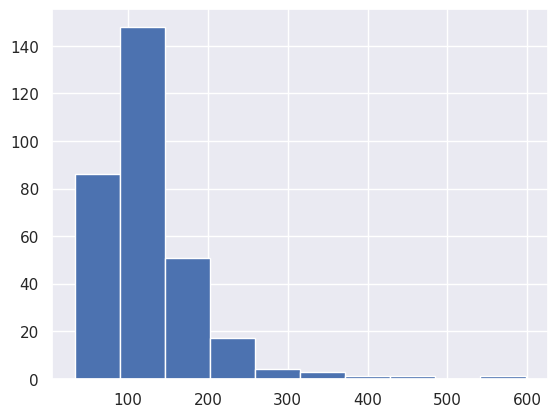

In [ ]:
plt.hist(data_cirrhosis['Tryglicerides'])
# триглицериды

<ipython-input-54-0df64c974ecf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cirrhosis["Tryglicerides_group"] = pd.cut(x=data_cirrhosis['Tryglicerides'], bins=[0,50,80,100,150,200,250,300,350]);


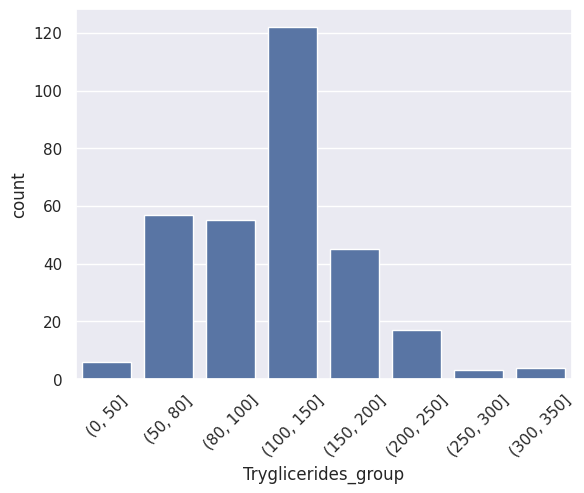

In [ ]:
data_cirrhosis["Tryglicerides_group"] = pd.cut(x=data_cirrhosis['Tryglicerides'], bins=[0,50,80,100,150,200,250,300,350]);
plt.xticks(rotation=45);
sns.countplot(x = data_cirrhosis['Tryglicerides_group']);

### Визуализация параметра "Тромбоциты"

(array([14., 34., 45., 69., 64., 46., 16., 15.,  5.,  4.]),
 array([ 62. , 112.1, 162.2, 212.3, 262.4, 312.5, 362.6, 412.7, 462.8,
        512.9, 563. ]),
 <BarContainer object of 10 artists>)

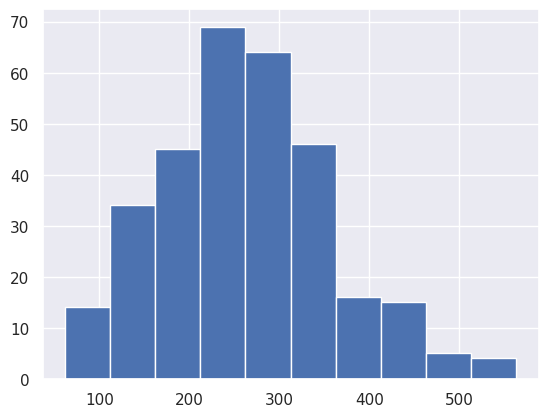

In [ ]:
plt.hist(data_cirrhosis['Platelets'])
# Тромбоциты

<ipython-input-56-1b12f5a4c0fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cirrhosis["Platelets_group"] = pd.cut(x=data_cirrhosis['Platelets'], bins=[50,100,150,200,250,300,400,600,800]);


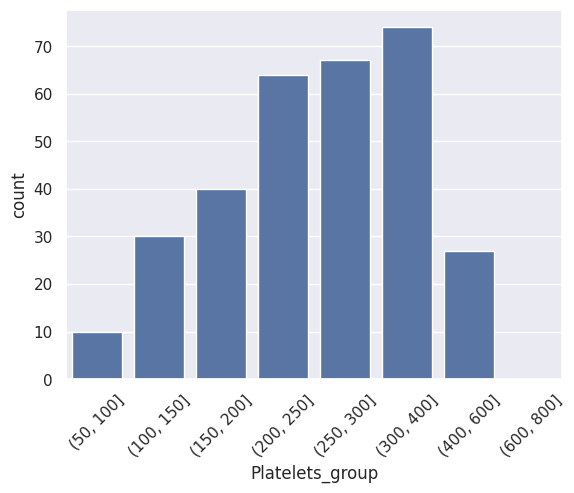

In [ ]:
data_cirrhosis["Platelets_group"] = pd.cut(x=data_cirrhosis['Platelets'], bins=[50,100,150,200,250,300,400,600,800]);
plt.xticks(rotation=45);
sns.countplot(x = data_cirrhosis['Platelets_group']);

### Визуализация параметра "Протромбин"

(array([ 53., 121.,  79.,  36.,  15.,   5.,   1.,   1.,   0.,   1.]),
 array([ 9.  ,  9.81, 10.62, 11.43, 12.24, 13.05, 13.86, 14.67, 15.48,
        16.29, 17.1 ]),
 <BarContainer object of 10 artists>)

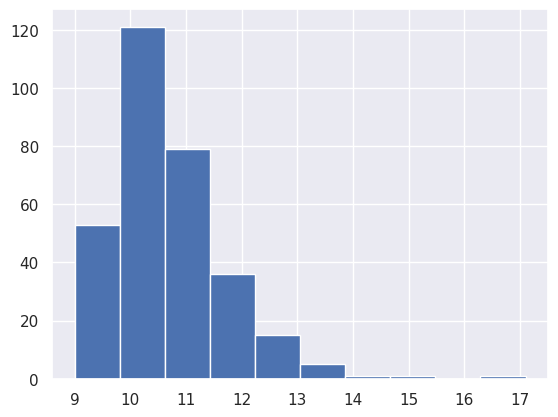

In [ ]:
plt.hist(data_cirrhosis['Prothrombin'])
# Протромбин

<ipython-input-59-ab2dfe9ae277>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cirrhosis["Prothrombin_group"] = pd.cut(x=data_cirrhosis['Prothrombin'], bins=[0,2,4,6,8,10,12,14,16,18]);


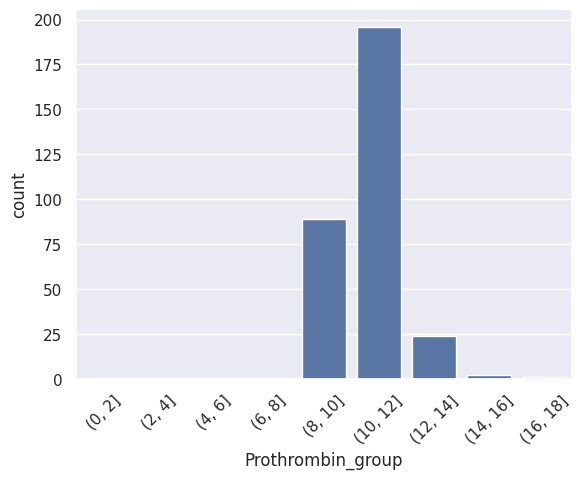

In [ ]:
data_cirrhosis["Prothrombin_group"] = pd.cut(x=data_cirrhosis['Prothrombin'], bins=[0,2,4,6,8,10,12,14,16,18]);
plt.xticks(rotation=45);
sns.countplot(x = data_cirrhosis['Prothrombin_group']);

### Визуализация параметра "стадия заболевания"

(array([ 16.,   0.,   0.,  67.,   0.,   0., 120.,   0.,   0., 109.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

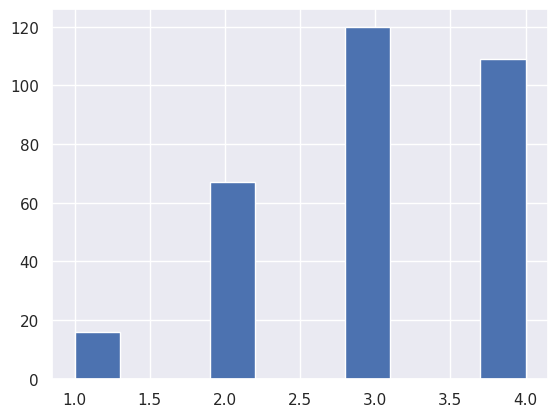

In [ ]:
plt.hist(data_cirrhosis['Stage']);
# гистологическая стадия заболевания (1, 2, 3 или 4)

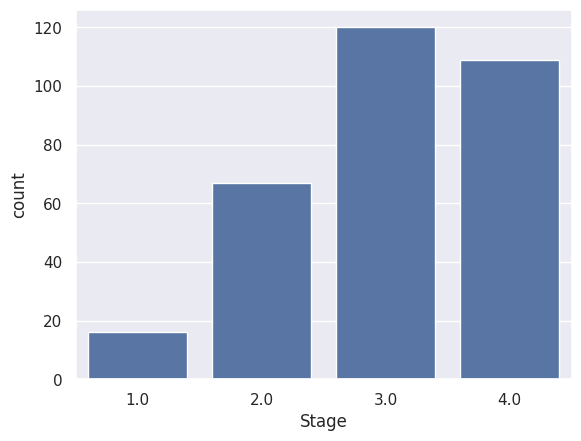

In [ ]:
sns.countplot(x = data_cirrhosis['Stage']);

### Тепловая карта

<Axes: >

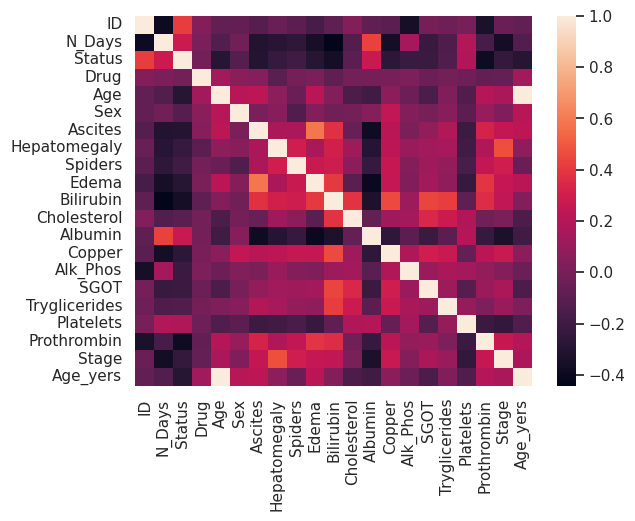

In [ ]:
sns.heatmap(data_cirrhosis.corr(numeric_only = True))